# Example: CitiBike data

Adapted from Kelsey Jordahl
https://gist.github.com/kjordahl/5957573

In [1]:
%matplotlib inline

import requests  
import json
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp

NYC borough boundaries downloaded from [Bytes of the Big Apple](http://www.nyc.gov/html/dcp/download/bytes/nybb_13a.zip)

In [2]:
boros = gp.GeoDataFrame.from_file('nybb_15b/nybb.shp')

Load real time bike station data from [CitiBike](http://citibikenyc.com) json API:

In [4]:
# get the bike data and convert it to a ditcionary
endpoint_url = 'http://citibikenyc.com/stations/json'
response = requests.get(endpoint_url)
data = json.loads(response.text)


In [5]:
# convert the relevant part to a geodataframe
df = gp.GeoDataFrame(data['stationBeanList'])
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,1,34,,72,,2017-03-13 04:46:19 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,11,22,,79,,2017-03-13 04:46:10 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,2,24,,82,,2017-03-13 04:44:26 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,23,37,,83,,2017-03-13 04:45:18 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,28,9,,116,,2017-03-13 04:44:12 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


In [6]:
# there is one row for each bike station.  How many stations are there? 
len(df)

672

In [7]:
# in the file above, there are lon-lats, but no geometry field
# we need to set that up

s = gp.GeoSeries([Point(x, y) for x, y in zip(df['longitude'], df['latitude'])])
df['geometry'] = s
df.crs = {'init': 'epsg:4326', 'no_defs': True}
df.geometry.total_bounds

(-74.096936600000006,
 40.661063371900603,
 -73.929891100000006,
 40.804212999999997)

In [8]:
# make sure they are on the same CRS.  
# checking the bounds is a nice way of seeing this
df.to_crs(boros.crs, inplace=True)
df.geometry.total_bounds

(957370.14732175611,
 180120.27032614074,
 1003695.8507545569,
 232275.23054640222)

In [9]:
# the geometry objects can do lots of cool stuff.  For example: 

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

372 stations in Manhattan


# Your turn

You can read about the range of operations available in geopandas here: 
    
http://geopandas.org/index.html

Your assignment is to: 

1. Calculate how many stations are in each borough
2. Calculate how many bikes are currently available in each borough
3. Read about and try at least two new spatial or geometric operations (beyond what I've covered here). 

In [10]:
Brooklyn = boros.geometry[1]
in_br = df.geometry.within(Brooklyn)
print(sum(in_br),'stations in Brooklyn')

Bronx = boros.geometry[4]
in_brx = df.geometry.within(Bronx)
print(sum(in_brx),'stations in Bronx')

staten_island = boros.geometry[0]
in_si = df.geometry.within(staten_island)
print(sum(in_si),'stations in Staten Island')

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

queens = boros.geometry[2]
in_qn = df.geometry.within(queens)
print(sum(in_qn), 'stations in Queens')

237 stations in Brooklyn
0 stations in Bronx
0 stations in Staten Island
372 stations in Manhattan
13 stations in Queens


In [11]:
boros.head()

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...
1,3,Brooklyn,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...
2,4,Queens,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...
3,1,Manhattan,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...


In [12]:
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks,geometry
0,,17,20,,72,,2017-02-21 11:42:28 AM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39,POINT (985931.706502895 218814.7571059909)
1,,9,24,,79,,2017-02-21 11:42:02 AM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33,POINT (982402.0068864136 201269.770346975)
2,,8,18,,82,,2017-02-21 11:44:32 AM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27,POINT (984204.131576321 198376.4207269395)
3,,30,31,,83,,2017-02-21 11:43:37 AM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62,POINT (990816.693171227 188413.5778061197)
4,,21,18,,116,,2017-02-21 11:42:33 AM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39,POINT (983835.0432398689 209525.6347344065)


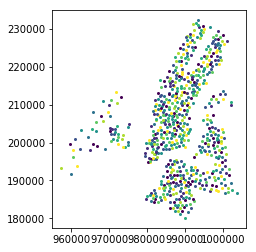

In [11]:
df.plot()

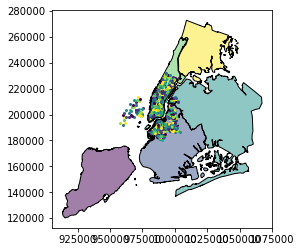

In [12]:
boros.plot(ax = df.plot())

In [15]:
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks,geometry
0,,17,20,,72,,2017-02-21 11:42:28 AM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39,POINT (985931.706502895 218814.7571059909)
1,,9,24,,79,,2017-02-21 11:42:02 AM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33,POINT (982402.0068864136 201269.770346975)
2,,8,18,,82,,2017-02-21 11:44:32 AM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27,POINT (984204.131576321 198376.4207269395)
3,,30,31,,83,,2017-02-21 11:43:37 AM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62,POINT (990816.693171227 188413.5778061197)
4,,21,18,,116,,2017-02-21 11:42:33 AM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39,POINT (983835.0432398689 209525.6347344065)


In [16]:
df.statusValue.unique()

array(['In Service', 'Not In Service'], dtype=object)

In [17]:
df2 = df[df['statusValue'] == 'Not In Service']

In [13]:
Brooklyn = boros.geometry[1]
in_br = (df.geometry.within(Brooklyn))
df['within_br'] = in_br
df2 = df[df['within_br'] == True]
print(sum(df2.availableBikes),'available bikes in Brooklyn')

Bronx = boros.geometry[4]
in_brx = df.geometry.within(Bronx)
df['within_brx'] = in_brx
df2 = df[df['within_brx'] == True]
print(sum(df2.availableBikes),'available bikes in Bronx')

staten_island = boros.geometry[0]
in_si = df.geometry.within(staten_island)
df['within_si'] = in_si
df2 = df[df['within_si'] == True]
print(sum(df2.availableBikes),'available bikes in Staten Island')

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
df['within_mn'] = in_mn
df2 = df[df['within_mn'] == True]
print(sum(df2.availableBikes), 'available bikes in Manhattan')

queens = boros.geometry[2]
in_qn = df.geometry.within(queens)
df['within_qn'] = in_qn
df2 = df[df['within_qn'] == True]
print(sum(df2.availableBikes), 'available bikes in Queens')

2664 available bikes in Brooklyn
0 available bikes in Bronx
0 available bikes in Staten Island
4220 available bikes in Manhattan
188 available bikes in Queens


In [19]:
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,...,stationName,statusKey,statusValue,testStation,totalDocks,geometry,within_br,within_brx,within_si,within_mn
0,,17,20,,72,,2017-02-21 11:42:28 AM,40.767272,,-73.993929,...,W 52 St & 11 Ave,1,In Service,False,39,POINT (985931.706502895 218814.7571059909),False,False,False,True
1,,9,24,,79,,2017-02-21 11:42:02 AM,40.719116,,-74.006667,...,Franklin St & W Broadway,1,In Service,False,33,POINT (982402.0068864136 201269.770346975),False,False,False,True
2,,8,18,,82,,2017-02-21 11:44:32 AM,40.711174,,-74.000165,...,St James Pl & Pearl St,1,In Service,False,27,POINT (984204.131576321 198376.4207269395),False,False,False,True
3,,30,31,,83,,2017-02-21 11:43:37 AM,40.683826,,-73.976323,...,Atlantic Ave & Fort Greene Pl,1,In Service,False,62,POINT (990816.693171227 188413.5778061197),True,False,False,False
4,,21,18,,116,,2017-02-21 11:42:33 AM,40.741776,,-74.001497,...,W 17 St & 8 Ave,1,In Service,False,39,POINT (983835.0432398689 209525.6347344065),False,False,False,True
